In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=DeprecationWarning) 
warnings.simplefilter("ignore", UserWarning)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

njobs = -1

In [2]:
train=pd.read_csv('train.csv',sep='|')
test=pd.read_csv('test.csv',sep='|')

In [3]:
print(train.fraud.value_counts())
print(train.fraud.value_counts() / len(train))

0    1775
1     104
Name: fraud, dtype: int64
0    0.944651
1    0.055349
Name: fraud, dtype: float64


# Feature Engineering

In [4]:
# for training set

train['scannedLineItems'] = train['scannedLineItemsPerSecond'] * train['totalScanTimeInSeconds']
train['pricePerScannedLineItem'] = train['grandTotal'] / train['scannedLineItems']
train['scansWithoutRegistrationPerScannedLineItem'] = train['scansWithoutRegistration'] / train['scannedLineItems']
train['quantityModificationsPerScannedLineItem'] = train['quantityModifications'] / train['scannedLineItems']
train['lineItemVoidsPerSecond'] = train['lineItemVoids'] / train['totalScanTimeInSeconds']
train['scansWithoutRegistrationPerSecond'] = train['scansWithoutRegistration'] / train['totalScanTimeInSeconds']
train['quantityModificationsPerSecond'] = train['quantityModifications'] / train['totalScanTimeInSeconds']
train['secondsPerEuro'] = train['totalScanTimeInSeconds'] / train['grandTotal']
train['lineItemVoidsPerEuro'] = train['lineItemVoids'] / train['grandTotal']
train['scansWithoutRegistrationPerEuro'] = train['scansWithoutRegistration'] / train['grandTotal']
train['quantityModificationsPerEuro'] = train['quantityModifications'] / train['grandTotal']


# for test set

test['scannedLineItems'] = test['scannedLineItemsPerSecond'] * test['totalScanTimeInSeconds']
test['pricePerScannedLineItem'] = test['grandTotal'] / test['scannedLineItems']
test['scansWithoutRegistrationPerScannedLineItem'] = test['scansWithoutRegistration'] / test['scannedLineItems']
test['quantityModificationsPerScannedLineItem'] = test['quantityModifications'] / test['scannedLineItems']
test['lineItemVoidsPerSecond'] = test['lineItemVoids'] / test['totalScanTimeInSeconds']
test['scansWithoutRegistrationPerSecond'] = train['scansWithoutRegistration'] / train['totalScanTimeInSeconds']
test['quantityModificationsPerSecond'] = train['quantityModifications'] / train['totalScanTimeInSeconds']
test['secondsPerEuro'] = train['totalScanTimeInSeconds'] / train['grandTotal']
test['lineItemVoidsPerEuro'] = train['lineItemVoids'] / train['grandTotal']
test['scansWithoutRegistrationPerEuro'] = train['scansWithoutRegistration'] / train['grandTotal']
test['quantityModificationsPerEuro'] = train['quantityModifications'] / train['grandTotal']

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer


def my_custom_loss_func(y_true, y_pred):
    cm = confusion_matrix(y_true,y_pred)
    tn, fp, fn, tp = cm.ravel()
    score = ((-25)*fp + (-5)*fn + 5*tp) / len(y_true)
    return (score)

my_custom_score = make_scorer(my_custom_loss_func, greater_is_better=True)

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneOut

skf = StratifiedKFold(n_splits=10)

# Applying oversampling to dataset
- Classical Oversampling
- SMOTE Technique
- ADASYN Technique

Each one has a slightly different approach for generating synthetic instances
- Simply duplicated fraud instances
- ADASYN focuses on generating samples next to the original samples which are wrongly classified using a k-Nearest Neighbors classifier
- SMOTE will not make any distinction between easy and hard samples to be classified using the nearest neighbors rule.


Only run one of the following three cells to apply a specific oversampling method!
Attention!! If we use oversampling we have problems using k-fold cross validation. Since we have a faked test set. It would be better to oversample in every k-fold iteration. ALternatively we need to switch back to a fixed training, test split.  
This is not implemented yet!

In [ ]:
#Initializing X_train, y_train
y_train = train['fraud']
X_train = train.drop('fraud',axis=1)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [ ]:
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=42)
X_train_res, y_train_res = ada.fit_resample(X_train, y_train)

# Building model factory

In [165]:
from sklearn.tree import ExtraTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm.classes import OneClassSVM
from sklearn.neural_network.multilayer_perceptron import MLPClassifier
from sklearn.neighbors.classification import RadiusNeighborsClassifier
from sklearn.neighbors.classification import KNeighborsClassifier
from sklearn.multioutput import ClassifierChain
from sklearn.multioutput import MultiOutputClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model.stochastic_gradient import SGDClassifier
from sklearn.linear_model.ridge import RidgeClassifierCV
from sklearn.linear_model.ridge import RidgeClassifier
from sklearn.linear_model.passive_aggressive import PassiveAggressiveClassifier
from sklearn.gaussian_process.gpc import GaussianProcessClassifier
from sklearn.ensemble.voting_classifier import VotingClassifier
from sklearn.ensemble.weight_boosting import AdaBoostClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.ensemble.bagging import BaggingClassifier
from sklearn.ensemble.forest import ExtraTreesClassifier
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import GaussianNB
from sklearn.semi_supervised import LabelPropagation
from sklearn.semi_supervised import LabelSpreading
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import NearestCentroid
from sklearn.svm import NuSVC
from sklearn.linear_model import Perceptron
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
# from sklearn.mixture import DPGMM
#from sklearn.mixture import GMM
#from sklearn.mixture import GaussianMixture
#from sklearn.mixture import VBGMM

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


model_tuning_factory = [
    GridSearchCV(LogisticRegression(max_iter = 10000), 
                 dict(# penalty = ['l1','l2'],  # automatic regularization  -> option 'l1' doesnt work with all solvers and leads to errors
                     solver = ['newton-cg', 'lbfgs', 'liblinear'], 
                     fit_intercept = [True, False]),
                    #  solver = ['lbfgs', 'liblinear', 'sag', 'saga']),
                 cv = skf,
                 scoring = my_custom_score),
    GridSearchCV(KNeighborsClassifier(), 
                 dict(n_neighbors = range(1,4),
                      weights = ['uniform', 'distance']),
                 cv = skf,
                 scoring = my_custom_score),
    GridSearchCV(NearestCentroid(),
                 dict(),
                 cv = skf,
                 scoring = my_custom_score), 
    GridSearchCV(DecisionTreeClassifier(),
                 dict(criterion = ['entropy', 'gini']),
                     # max_depth = range(1,100)),
                 #     max_leaf_nodes = range(2,100)),
                 cv = skf,
                 scoring = my_custom_score),
    GridSearchCV(ExtraTreeClassifier(),
                 dict(criterion = ['entropy', 'gini']),
                     # max_depth = range(1,100)),
                 #     max_leaf_nodes = range(2,100)),
                 cv = skf,
                 scoring = my_custom_score),
    GridSearchCV(ExtraTreesClassifier(),
                 dict(criterion = ['entropy', 'gini']),
                      # n_estimators  = range(1,150)),
                 cv = skf,
                 scoring = my_custom_score),    
    GridSearchCV(RandomForestClassifier(),
                 dict(criterion = ['entropy', 'gini']),
                     # n_estimators  = range(1,150)),
                 cv = skf,
                 scoring = my_custom_score),    
    GridSearchCV(BernoulliNB(),
                 dict(binarize  = np.arange(0.0, 2.0, 0.1)),
                 cv = skf,
                 scoring = my_custom_score), 
    GridSearchCV(GaussianNB(),
                 dict(),
                 cv = skf,
                 scoring = my_custom_score), 
    GridSearchCV(AdaBoostClassifier(),
                 dict(),
                 #dict(n_estimators = range(1,150)),
                 cv = skf,
                 scoring = my_custom_score), 
    GridSearchCV(GradientBoostingClassifier(),
                 dict(),
                 #dict(n_estimators = range(1,150)),
                 #     learning_rate = np.arange(0.01, 1.0, 0.01)),
                 cv = skf,
                 scoring = my_custom_score),                     
    GridSearchCV(BaggingClassifier(), 
                 dict(),
                 #dict(n_estimators = range(1,150)),
                 cv = skf,
                 scoring = my_custom_score), 
    GridSearchCV(Perceptron(),
                 dict(),
                 cv = skf,
                 scoring = my_custom_score), 
    GridSearchCV(LinearDiscriminantAnalysis(),
                 dict(),
                 cv = skf,
                 scoring = my_custom_score),
    GridSearchCV(QuadraticDiscriminantAnalysis(),
                 dict(),
                 cv = skf,
                 scoring = my_custom_score),
    GridSearchCV(SVC(),
                 dict(),
                 cv = skf,
                 scoring = my_custom_score)
]           
                 
                 
iterations = 10                 
               
model_tuning_factory_randomized = [
    RandomizedSearchCV(LogisticRegression(max_iter = 10000), 
                 dict(# penalty = ['l1','l2'],  # automatic regularization  -> option 'l1' doesnt work with all solvers and leads to errors
                       solver = ['newton-cg', 'lbfgs', 'liblinear'],
                       fit_intercept = [True, False]),
                    #  solver = ['lbfgs', 'liblinear', 'sag', 'saga']),
                 cv = skf,
                 scoring = my_custom_score,
                 n_iter = iterations),
    RandomizedSearchCV(KNeighborsClassifier(), 
                 dict(n_neighbors = range(1,4),
                      weights = ['uniform', 'distance']),
                 cv = skf,
                 scoring = my_custom_score,
                 n_iter = iterations),
    RandomizedSearchCV(NearestCentroid(),
                 dict(),
                 cv = skf,
                 scoring = my_custom_score), 
    RandomizedSearchCV(DecisionTreeClassifier(),
                 dict(criterion = ['entropy', 'gini']),
                     # max_depth = range(1,100)),
                 #     max_leaf_nodes = range(2,100)),
                 cv = skf,
                 scoring = my_custom_score,
                 n_iter = iterations),
    RandomizedSearchCV(ExtraTreeClassifier(),
                 dict(criterion = ['entropy', 'gini']),
                     # max_depth = range(1,100)),
                 #     max_leaf_nodes = range(2,100)),
                 cv = skf,
                 scoring = my_custom_score,
                 n_iter = iterations),
    RandomizedSearchCV(ExtraTreesClassifier(),
                 dict(criterion = ['entropy', 'gini'],
                      n_estimators  = range(1,150)),
                 cv = skf,
                 scoring = my_custom_score),    
    RandomizedSearchCV(RandomForestClassifier(),
                 dict(criterion = ['entropy', 'gini'],
                      n_estimators  = range(1,150)),
                 cv = skf,
                 scoring = my_custom_score,
                 n_iter = iterations),    
    RandomizedSearchCV(BernoulliNB(),
                 dict(binarize  = np.arange(0.0, 1.0, 0.1)),
                 cv = skf,
                 scoring = my_custom_score,
                 n_iter = iterations), 
    RandomizedSearchCV(GaussianNB(),
                 dict(),
                 cv = skf,
                 scoring = my_custom_score), 
    RandomizedSearchCV(AdaBoostClassifier(),
                 dict(n_estimators = range(1,150)),
                 cv = skf,
                 scoring = my_custom_score,
                 n_iter = iterations),
    RandomizedSearchCV(GradientBoostingClassifier(),
                 dict(n_estimators = range(1,150),
                      learning_rate = np.arange(0.01, 1.0, 0.01)),
                 cv = skf,
                 scoring = my_custom_score,
                 n_iter = iterations),                    
    RandomizedSearchCV(BaggingClassifier(), 
                 dict(n_estimators = range(1,150)),
                 cv = skf,
                 scoring = my_custom_score,
                 n_iter = iterations),
    RandomizedSearchCV(Perceptron(),
                 dict(),
                 cv = skf,
                 scoring = my_custom_score,
                 n_iter = iterations),
    RandomizedSearchCV(LinearDiscriminantAnalysis(),
                 dict(),
                 cv = skf,
                 scoring = my_custom_score,
                 n_iter = iterations),
    RandomizedSearchCV(QuadraticDiscriminantAnalysis(),
                 dict(),
                 cv = skf,
                 scoring = my_custom_score,
                 n_iter = iterations),
    RandomizedSearchCV(SVC(),
                 dict(),
                 cv = skf,
                 scoring = my_custom_score,
                 n_iter = iterations)
]

In [166]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer

def my_custom_loss_func(y_true, y_pred):
    cm = confusion_matrix(y_true,y_pred)
    tn, fp, fn, tp = cm.ravel()
    score = ((-25)*fp + (-5)*fn + 5*tp) / len(y_true)
    return (score)

my_custom_score = make_scorer(my_custom_loss_func, greater_is_better=True)

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneOut

skf = StratifiedKFold(n_splits=10)
loo = LeaveOneOut()

In [167]:
Y = train['fraud']
X = train.drop('fraud',axis=1)

In [168]:
import time
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif

from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler

result_table = pd.DataFrame(columns=["Model", "Data Preparation", "Feature Count", "Features", "Optimal Parameters", "Monetary Value Per Instance - Mean", "Monetary Value Per Instance - Standard Deviation", "Time needed", "Raw Model"])


# three types of data preparation: No preparation, MaxMinScaler, StandardScaler
for data_preparation_step in range(1,4):
    if (data_preparation_step == 1):  
        X_scaled = X
        data_preparation = "No Scaling"
    elif (data_preparation_step == 2):
        feature_scaler = MinMaxScaler()  
        feature_scaler.fit_transform(X.values) 
        X_scaled = pd.DataFrame(feature_scaler.fit_transform(X.values), columns=X.columns, index=X.index) 
        data_preparation = "MinMaxScaler"
    elif (data_preparation_step == 3):
        feature_scaler = StandardScaler()  
        feature_scaler.fit_transform(X.values) 
        X_scaled = pd.DataFrame(feature_scaler.fit_transform(X.values), columns=X.columns, index=X.index)
        data_preparation = "StandardScaler"

    for feature_count in range(1,len(list(X))+1):

        for model in model_tuning_factory:   # replace with model_tuning_factory_randomized for faster results
            
            start_time = time.time()
            
            best_features = SelectKBest(f_classif, k=feature_count).fit(X_scaled,Y)
            best_feature_list = X.columns[best_features.get_support()]
            X_selected_features = X[best_feature_list]
            
            model.seed = 42
            model.fit(X_selected_features,Y)  
            model_name = model.best_estimator_.__class__.__name__
            score_mean = model.cv_results_['mean_test_score'][model.best_index_]
            score_std = model.cv_results_['std_test_score'][model.best_index_]
            
            end_time = time.time()
            
            print("Finished " + model.best_estimator_.__class__.__name__ + " with " + data_preparation + " and " + str(feature_count) + " features after " + str(end_time - start_time) + " seconds")

            result_table = result_table.append({
             "Model": model_name,
             "Data Preparation": data_preparation,
             "Feature Count": feature_count,
             "Features": best_feature_list.values,
             "Optimal Parameters": model.best_params_,
             "Monetary Value Per Instance - Mean":  score_mean,
             "Monetary Value Per Instance - Standard Deviation": score_std,
             "Time needed": end_time - start_time,    
             "Raw Model": model.best_estimator_
              }, ignore_index=True)
    
result_table.sort_values(by = "Monetary Value Per Instance - Mean", ascending = False)

Finished LogisticRegression with No Scaling and 1 features after 0.3036189079284668 seconds
Finished KNeighborsClassifier with No Scaling and 1 features after 1.2380154132843018 seconds
Finished NearestCentroid with No Scaling and 1 features after 0.07284069061279297 seconds
Finished DecisionTreeClassifier with No Scaling and 1 features after 0.0718076229095459 seconds
Finished ExtraTreeClassifier with No Scaling and 1 features after 0.07679462432861328 seconds
Finished ExtraTreesClassifier with No Scaling and 1 features after 0.19370341300964355 seconds
Finished RandomForestClassifier with No Scaling and 1 features after 0.20351243019104004 seconds
Finished BernoulliNB with No Scaling and 1 features after 0.790879487991333 seconds
Finished GaussianNB with No Scaling and 1 features after 0.03889584541320801 seconds
Finished AdaBoostClassifier with No Scaling and 1 features after 0.533320426940918 seconds
Finished GradientBoostingClassifier with No Scaling and 1 features after 0.3536434

C:\Users\ahuem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


Finished LogisticRegression with No Scaling and 3 features after 1.9413282871246338 seconds
Finished KNeighborsClassifier with No Scaling and 3 features after 1.2038233280181885 seconds
Finished NearestCentroid with No Scaling and 3 features after 0.03998303413391113 seconds
Finished DecisionTreeClassifier with No Scaling and 3 features after 0.08494830131530762 seconds
Finished ExtraTreeClassifier with No Scaling and 3 features after 0.07691240310668945 seconds
Finished ExtraTreesClassifier with No Scaling and 3 features after 0.2290651798248291 seconds
Finished RandomForestClassifier with No Scaling and 3 features after 0.24510598182678223 seconds
Finished BernoulliNB with No Scaling and 3 features after 0.7771742343902588 seconds
Finished GaussianNB with No Scaling and 3 features after 0.04195213317871094 seconds
Finished AdaBoostClassifier with No Scaling and 3 features after 0.6175737380981445 seconds
Finished GradientBoostingClassifier with No Scaling and 3 features after 0.61790

Finished AdaBoostClassifier with No Scaling and 8 features after 0.7955920696258545 seconds
Finished GradientBoostingClassifier with No Scaling and 8 features after 0.9228272438049316 seconds
Finished BaggingClassifier with No Scaling and 8 features after 0.21944737434387207 seconds
Finished Perceptron with No Scaling and 8 features after 0.043883323669433594 seconds
Finished LinearDiscriminantAnalysis with No Scaling and 8 features after 0.05482673645019531 seconds
Finished QuadraticDiscriminantAnalysis with No Scaling and 8 features after 0.07033324241638184 seconds
Finished SVC with No Scaling and 8 features after 2.7974326610565186 seconds
Finished LogisticRegression with No Scaling and 9 features after 3.534945487976074 seconds
Finished KNeighborsClassifier with No Scaling and 9 features after 1.2779648303985596 seconds
Finished NearestCentroid with No Scaling and 9 features after 0.04096817970275879 seconds
Finished DecisionTreeClassifier with No Scaling and 9 features after 0.10

Finished DecisionTreeClassifier with No Scaling and 14 features after 0.15958857536315918 seconds
Finished ExtraTreeClassifier with No Scaling and 14 features after 0.09474587440490723 seconds
Finished ExtraTreesClassifier with No Scaling and 14 features after 0.2822449207305908 seconds
Finished RandomForestClassifier with No Scaling and 14 features after 0.38735437393188477 seconds
Finished BernoulliNB with No Scaling and 14 features after 0.9552690982818604 seconds
Finished GaussianNB with No Scaling and 14 features after 0.04884457588195801 seconds
Finished AdaBoostClassifier with No Scaling and 14 features after 1.1049606800079346 seconds
Finished GradientBoostingClassifier with No Scaling and 14 features after 1.3637938499450684 seconds
Finished BaggingClassifier with No Scaling and 14 features after 0.33716893196105957 seconds
Finished Perceptron with No Scaling and 14 features after 0.04502701759338379 seconds
Finished LinearDiscriminantAnalysis with No Scaling and 14 features a

Finished BaggingClassifier with No Scaling and 19 features after 0.4555988311767578 seconds
Finished Perceptron with No Scaling and 19 features after 0.058443307876586914 seconds
Finished LinearDiscriminantAnalysis with No Scaling and 19 features after 0.09642267227172852 seconds
Finished QuadraticDiscriminantAnalysis with No Scaling and 19 features after 0.07176899909973145 seconds
Finished SVC with No Scaling and 19 features after 3.4542348384857178 seconds
Finished LogisticRegression with No Scaling and 20 features after 15.811950922012329 seconds
Finished KNeighborsClassifier with No Scaling and 20 features after 1.6665894985198975 seconds
Finished NearestCentroid with No Scaling and 20 features after 0.04687309265136719 seconds
Finished DecisionTreeClassifier with No Scaling and 20 features after 0.1887197494506836 seconds
Finished ExtraTreeClassifier with No Scaling and 20 features after 0.08375978469848633 seconds
Finished ExtraTreesClassifier with No Scaling and 20 features aft

C:\Users\ahuem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


Finished LogisticRegression with MinMaxScaler and 3 features after 2.0209572315216064 seconds
Finished KNeighborsClassifier with MinMaxScaler and 3 features after 1.1982510089874268 seconds
Finished NearestCentroid with MinMaxScaler and 3 features after 0.04094958305358887 seconds
Finished DecisionTreeClassifier with MinMaxScaler and 3 features after 0.08505725860595703 seconds
Finished ExtraTreeClassifier with MinMaxScaler and 3 features after 0.07696700096130371 seconds
Finished ExtraTreesClassifier with MinMaxScaler and 3 features after 0.22079086303710938 seconds
Finished RandomForestClassifier with MinMaxScaler and 3 features after 0.241546630859375 seconds
Finished BernoulliNB with MinMaxScaler and 3 features after 0.7772653102874756 seconds
Finished GaussianNB with MinMaxScaler and 3 features after 0.04191446304321289 seconds
Finished AdaBoostClassifier with MinMaxScaler and 3 features after 0.6142480373382568 seconds
Finished GradientBoostingClassifier with MinMaxScaler and 3 f

Finished BernoulliNB with MinMaxScaler and 8 features after 0.8144686222076416 seconds
Finished GaussianNB with MinMaxScaler and 8 features after 0.0433354377746582 seconds
Finished AdaBoostClassifier with MinMaxScaler and 8 features after 0.7786092758178711 seconds
Finished GradientBoostingClassifier with MinMaxScaler and 8 features after 0.9078750610351562 seconds
Finished BaggingClassifier with MinMaxScaler and 8 features after 0.20990943908691406 seconds
Finished Perceptron with MinMaxScaler and 8 features after 0.04299616813659668 seconds
Finished LinearDiscriminantAnalysis with MinMaxScaler and 8 features after 0.05284619331359863 seconds
Finished QuadraticDiscriminantAnalysis with MinMaxScaler and 8 features after 0.04589080810546875 seconds
Finished SVC with MinMaxScaler and 8 features after 2.678204298019409 seconds
Finished LogisticRegression with MinMaxScaler and 9 features after 3.2970030307769775 seconds
Finished KNeighborsClassifier with MinMaxScaler and 9 features after 

Finished SVC with MinMaxScaler and 13 features after 2.932309627532959 seconds
Finished LogisticRegression with MinMaxScaler and 14 features after 3.453644275665283 seconds
Finished KNeighborsClassifier with MinMaxScaler and 14 features after 1.3564579486846924 seconds
Finished NearestCentroid with MinMaxScaler and 14 features after 0.04187750816345215 seconds
Finished DecisionTreeClassifier with MinMaxScaler and 14 features after 0.14086031913757324 seconds
Finished ExtraTreeClassifier with MinMaxScaler and 14 features after 0.0828096866607666 seconds
Finished ExtraTreesClassifier with MinMaxScaler and 14 features after 0.25191545486450195 seconds
Finished RandomForestClassifier with MinMaxScaler and 14 features after 0.3466379642486572 seconds
Finished BernoulliNB with MinMaxScaler and 14 features after 0.8397088050842285 seconds
Finished GaussianNB with MinMaxScaler and 14 features after 0.0438840389251709 seconds
Finished AdaBoostClassifier with MinMaxScaler and 14 features after 1

Finished RandomForestClassifier with MinMaxScaler and 19 features after 0.41509366035461426 seconds
Finished BernoulliNB with MinMaxScaler and 19 features after 0.8928084373474121 seconds
Finished GaussianNB with MinMaxScaler and 19 features after 0.06699085235595703 seconds
Finished AdaBoostClassifier with MinMaxScaler and 19 features after 1.3812921047210693 seconds
Finished GradientBoostingClassifier with MinMaxScaler and 19 features after 1.7205183506011963 seconds
Finished BaggingClassifier with MinMaxScaler and 19 features after 0.4481992721557617 seconds
Finished Perceptron with MinMaxScaler and 19 features after 0.04883980751037598 seconds
Finished LinearDiscriminantAnalysis with MinMaxScaler and 19 features after 0.06883430480957031 seconds
Finished QuadraticDiscriminantAnalysis with MinMaxScaler and 19 features after 0.04987072944641113 seconds
Finished SVC with MinMaxScaler and 19 features after 3.307220697402954 seconds
Finished LogisticRegression with MinMaxScaler and 20 f

C:\Users\ahuem\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


Finished LogisticRegression with StandardScaler and 3 features after 1.9424052238464355 seconds
Finished KNeighborsClassifier with StandardScaler and 3 features after 1.2192623615264893 seconds
Finished NearestCentroid with StandardScaler and 3 features after 0.040955305099487305 seconds
Finished DecisionTreeClassifier with StandardScaler and 3 features after 0.08665990829467773 seconds
Finished ExtraTreeClassifier with StandardScaler and 3 features after 0.07804393768310547 seconds
Finished ExtraTreesClassifier with StandardScaler and 3 features after 0.22497153282165527 seconds
Finished RandomForestClassifier with StandardScaler and 3 features after 0.24167108535766602 seconds
Finished BernoulliNB with StandardScaler and 3 features after 0.7987942695617676 seconds
Finished GaussianNB with StandardScaler and 3 features after 0.04387950897216797 seconds
Finished AdaBoostClassifier with StandardScaler and 3 features after 0.6235442161560059 seconds
Finished GradientBoostingClassifier wi

Finished ExtraTreesClassifier with StandardScaler and 8 features after 0.24467062950134277 seconds
Finished RandomForestClassifier with StandardScaler and 8 features after 0.28889894485473633 seconds
Finished BernoulliNB with StandardScaler and 8 features after 0.8200726509094238 seconds
Finished GaussianNB with StandardScaler and 8 features after 0.04388117790222168 seconds
Finished AdaBoostClassifier with StandardScaler and 8 features after 0.7947165966033936 seconds
Finished GradientBoostingClassifier with StandardScaler and 8 features after 0.9151272773742676 seconds
Finished BaggingClassifier with StandardScaler and 8 features after 0.21273064613342285 seconds
Finished Perceptron with StandardScaler and 8 features after 0.04535388946533203 seconds
Finished LinearDiscriminantAnalysis with StandardScaler and 8 features after 0.057845115661621094 seconds
Finished QuadraticDiscriminantAnalysis with StandardScaler and 8 features after 0.07081770896911621 seconds
Finished SVC with Stand

Finished GradientBoostingClassifier with StandardScaler and 13 features after 1.274977207183838 seconds
Finished BaggingClassifier with StandardScaler and 13 features after 0.30468082427978516 seconds
Finished Perceptron with StandardScaler and 13 features after 0.04533052444458008 seconds
Finished LinearDiscriminantAnalysis with StandardScaler and 13 features after 0.06091427803039551 seconds
Finished QuadraticDiscriminantAnalysis with StandardScaler and 13 features after 0.0468747615814209 seconds
Finished SVC with StandardScaler and 13 features after 3.0125505924224854 seconds
Finished LogisticRegression with StandardScaler and 14 features after 3.413684368133545 seconds
Finished KNeighborsClassifier with StandardScaler and 14 features after 1.419867753982544 seconds
Finished NearestCentroid with StandardScaler and 14 features after 0.0418851375579834 seconds
Finished DecisionTreeClassifier with StandardScaler and 14 features after 0.14310789108276367 seconds
Finished ExtraTreeClass

Finished SVC with StandardScaler and 18 features after 3.2703685760498047 seconds
Finished LogisticRegression with StandardScaler and 19 features after 11.832253694534302 seconds
Finished KNeighborsClassifier with StandardScaler and 19 features after 1.6456446647644043 seconds
Finished NearestCentroid with StandardScaler and 19 features after 0.044881343841552734 seconds
Finished DecisionTreeClassifier with StandardScaler and 19 features after 0.18765473365783691 seconds
Finished ExtraTreeClassifier with StandardScaler and 19 features after 0.08493375778198242 seconds
Finished ExtraTreesClassifier with StandardScaler and 19 features after 0.26637792587280273 seconds
Finished RandomForestClassifier with StandardScaler and 19 features after 0.41555356979370117 seconds
Finished BernoulliNB with StandardScaler and 19 features after 0.898801326751709 seconds
Finished GaussianNB with StandardScaler and 19 features after 0.0538785457611084 seconds
Finished AdaBoostClassifier with StandardScal

,Model,Data Preparation,Feature Count,Features,Optimal Parameters,Monetary Value Per Instance - Mean,Monetary Value Per Instance - Standard Deviation,Time needed,Raw Model
192,LogisticRegression,No Scaling,13,"[trustLevel, totalScanTimeInSeconds, lineItemV...","{'fit_intercept': True, 'solver': 'newton-cg'}",0.162320,0.113088,4.073425,"LogisticRegression(C=1.0, class_weight=None, d..."
544,LogisticRegression,MinMaxScaler,15,"[trustLevel, totalScanTimeInSeconds, lineItemV...","{'fit_intercept': True, 'solver': 'newton-cg'}",0.162320,0.113088,4.557611,"LogisticRegression(C=1.0, class_weight=None, d..."
864,LogisticRegression,StandardScaler,15,"[trustLevel, totalScanTimeInSeconds, lineItemV...","{'fit_intercept': True, 'solver': 'newton-cg'}",0.162320,0.113088,4.904764,"LogisticRegression(C=1.0, class_weight=None, d..."
224,LogisticRegression,No Scaling,15,"[trustLevel, totalScanTimeInSeconds, lineItemV...","{'fit_intercept': True, 'solver': 'newton-cg'}",0.162320,0.113088,5.328012,"LogisticRegression(C=1.0, class_weight=None, d..."
832,LogisticRegression,StandardScaler,13,"[trustLevel, totalScanTimeInSeconds, lineItemV...","{'fit_intercept': True, 'solver': 'newton-cg'}",0.162320,0.113088,3.994062,"LogisticRegression(C=1.0, class_weight=None, d..."
512,LogisticRegression,MinMaxScaler,13,"[trustLevel, totalScanTimeInSeconds, lineItemV...","{'fit_intercept': True, 'solver': 'newton-cg'}",0.162320,0.113088,3.869961,"LogisticRegression(C=1.0, class_weight=None, d..."
176,LogisticRegression,No Scaling,12,"[trustLevel, totalScanTimeInSeconds, lineItemV...","{'fit_intercept': True, 'solver': 'newton-cg'}",0.156998,0.126081,3.497274,"LogisticRegression(C=1.0, class_weight=None, d..."
768,LogisticRegression,StandardScaler,9,"[trustLevel, totalScanTimeInSeconds, lineItemV...","{'fit_intercept': True, 'solver': 'newton-cg'}",0.156998,0.126081,3.592789,"LogisticRegression(C=1.0, class_weight=None, d..."
240,LogisticRegression,No Scaling,16,"[trustLevel, totalScanTimeInSeconds, lineItemV...","{'fit_intercept': True, 'solver': 'lbfgs'}",0.156998,0.120305,7.113569,"LogisticRegression(C=1.0, class_weight=None, d..."
784,LogisticRegression,StandardScaler,10,"[trustLevel, totalScanTimeInSeconds, lineItemV...","{'fit_intercept': True, 'solver': 'newton-cg'}",0.156998,0.126081,3.193290,"LogisticRegression(C=1.0, class_weight=None, d..."


# Restore the saved result table to avoid recomputation

In [205]:
# result_table.to_pickle("result_table_training_set.pkl")
result_table = pd.read_pickle("result_table_training_set.pkl")

In [206]:
result_table = result_table.sort_values(by = "Monetary Value Per Instance - Mean", ascending = False)

result_table.to_excel("Result-Train Set.xlsx")

result_table

,Model,Data Preparation,Feature Count,Features,Optimal Parameters,Monetary Value Per Instance - Mean,Monetary Value Per Instance - Standard Deviation,Time needed,Raw Model
192,LogisticRegression,No Scaling,13,"[trustLevel, totalScanTimeInSeconds, lineItemV...","{'fit_intercept': True, 'solver': 'newton-cg'}",0.162320,0.113088,4.073425,"LogisticRegression(C=1.0, class_weight=None, d..."
544,LogisticRegression,MinMaxScaler,15,"[trustLevel, totalScanTimeInSeconds, lineItemV...","{'fit_intercept': True, 'solver': 'newton-cg'}",0.162320,0.113088,4.557611,"LogisticRegression(C=1.0, class_weight=None, d..."
512,LogisticRegression,MinMaxScaler,13,"[trustLevel, totalScanTimeInSeconds, lineItemV...","{'fit_intercept': True, 'solver': 'newton-cg'}",0.162320,0.113088,3.869961,"LogisticRegression(C=1.0, class_weight=None, d..."
224,LogisticRegression,No Scaling,15,"[trustLevel, totalScanTimeInSeconds, lineItemV...","{'fit_intercept': True, 'solver': 'newton-cg'}",0.162320,0.113088,5.328012,"LogisticRegression(C=1.0, class_weight=None, d..."
832,LogisticRegression,StandardScaler,13,"[trustLevel, totalScanTimeInSeconds, lineItemV...","{'fit_intercept': True, 'solver': 'newton-cg'}",0.162320,0.113088,3.994062,"LogisticRegression(C=1.0, class_weight=None, d..."
864,LogisticRegression,StandardScaler,15,"[trustLevel, totalScanTimeInSeconds, lineItemV...","{'fit_intercept': True, 'solver': 'newton-cg'}",0.162320,0.113088,4.904764,"LogisticRegression(C=1.0, class_weight=None, d..."
848,LogisticRegression,StandardScaler,14,"[trustLevel, totalScanTimeInSeconds, lineItemV...","{'fit_intercept': True, 'solver': 'newton-cg'}",0.156998,0.120368,3.413684,"LogisticRegression(C=1.0, class_weight=None, d..."
560,LogisticRegression,MinMaxScaler,16,"[trustLevel, totalScanTimeInSeconds, lineItemV...","{'fit_intercept': True, 'solver': 'lbfgs'}",0.156998,0.120305,7.448275,"LogisticRegression(C=1.0, class_weight=None, d..."
880,LogisticRegression,StandardScaler,16,"[trustLevel, totalScanTimeInSeconds, lineItemV...","{'fit_intercept': True, 'solver': 'lbfgs'}",0.156998,0.120305,7.532419,"LogisticRegression(C=1.0, class_weight=None, d..."
160,LogisticRegression,No Scaling,11,"[trustLevel, totalScanTimeInSeconds, lineItemV...","{'fit_intercept': True, 'solver': 'newton-cg'}",0.156998,0.126081,3.746402,"LogisticRegression(C=1.0, class_weight=None, d..."


In [198]:
result_table_aggregated = pd.DataFrame(columns=["Model", "Data Preparation", "Feature Count", "Features", "Optimal Parameters", "Monetary Value Per Instance - Mean", "Monetary Value Per Instance - Standard Deviation", "Time needed", "Raw Model"])


for model in list(set(result_table["Model"].values)):
    sub_table = result_table[result_table["Model"] == model]
    result_table_aggregated = result_table_aggregated.append({
        "Model": model,
        "Data Preparation": sub_table.loc[sub_table["Monetary Value Per Instance - Mean"].argmax()]["Data Preparation"],
        "Feature Count": sub_table.loc[sub_table["Monetary Value Per Instance - Mean"].argmax()]["Feature Count"],
        "Features": sub_table.loc[sub_table["Monetary Value Per Instance - Mean"].argmax()]["Features"],
        "Optimal Parameters": sub_table.loc[sub_table["Monetary Value Per Instance - Mean"].argmax()]["Optimal Parameters"],
        "Monetary Value Per Instance - Mean": sub_table.loc[sub_table["Monetary Value Per Instance - Mean"].argmax()]["Monetary Value Per Instance - Mean"],
        "Monetary Value Per Instance - Standard Deviation": sub_table.loc[sub_table["Monetary Value Per Instance - Mean"].argmax()]["Monetary Value Per Instance - Standard Deviation"],
        "Time needed":  sub_table.loc[sub_table["Monetary Value Per Instance - Mean"].argmax()]["Time needed"],
        "Raw Model": sub_table.loc[sub_table["Monetary Value Per Instance - Mean"].argmax()]["Raw Model"]
        }, ignore_index=True)

result_table_aggregated.to_excel("Result-Train Set-Aggregated.xlsx")

result_table_aggregated.sort_values(by = "Monetary Value Per Instance - Mean", ascending = False)

,Model,Data Preparation,Feature Count,Features,Optimal Parameters,Monetary Value Per Instance - Mean,Monetary Value Per Instance - Standard Deviation,Time needed,Raw Model
14,LogisticRegression,No Scaling,13,"[trustLevel, totalScanTimeInSeconds, lineItemV...","{'fit_intercept': True, 'solver': 'newton-cg'}",0.162320,0.113088,4.073425,"LogisticRegression(C=1.0, class_weight=None, d..."
12,GradientBoostingClassifier,MinMaxScaler,10,"[trustLevel, totalScanTimeInSeconds, lineItemV...",{},0.106440,0.134110,1.024106,([DecisionTreeRegressor(criterion='friedman_ms...
1,RandomForestClassifier,StandardScaler,12,"[trustLevel, totalScanTimeInSeconds, lineItemV...",{'criterion': 'entropy'},0.098457,0.053057,0.342503,"(DecisionTreeClassifier(class_weight=None, cri..."
11,AdaBoostClassifier,StandardScaler,8,"[trustLevel, totalScanTimeInSeconds, scansWith...",{},0.090474,0.127099,0.794717,"(DecisionTreeClassifier(class_weight=None, cri..."
10,ExtraTreesClassifier,StandardScaler,10,"[trustLevel, totalScanTimeInSeconds, lineItemV...",{'criterion': 'entropy'},0.085152,0.086309,0.245771,"(ExtraTreeClassifier(class_weight=None, criter..."
4,BaggingClassifier,No Scaling,10,"[trustLevel, totalScanTimeInSeconds, lineItemV...",{},0.042576,0.126605,0.240818,"(DecisionTreeClassifier(class_weight=None, cri..."
7,DecisionTreeClassifier,MinMaxScaler,19,"[trustLevel, totalScanTimeInSeconds, grandTota...",{'criterion': 'gini'},-0.021288,0.169132,0.186151,"DecisionTreeClassifier(class_weight=None, crit..."
9,LinearDiscriminantAnalysis,StandardScaler,11,"[trustLevel, totalScanTimeInSeconds, lineItemV...",{},-0.069186,0.113139,0.056847,"LinearDiscriminantAnalysis(n_components=None, ..."
3,QuadraticDiscriminantAnalysis,StandardScaler,3,"[trustLevel, totalScanTimeInSeconds, scannedLi...",{},-0.082491,0.220512,0.062891,"QuadraticDiscriminantAnalysis(priors=None, reg..."
8,GaussianNB,StandardScaler,3,"[trustLevel, totalScanTimeInSeconds, scannedLi...",{},-0.093135,0.184733,0.043880,"GaussianNB(priors=None, var_smoothing=1e-09)"


Text(0, 0.5, 'Monetary Value Per Instance - Mean')

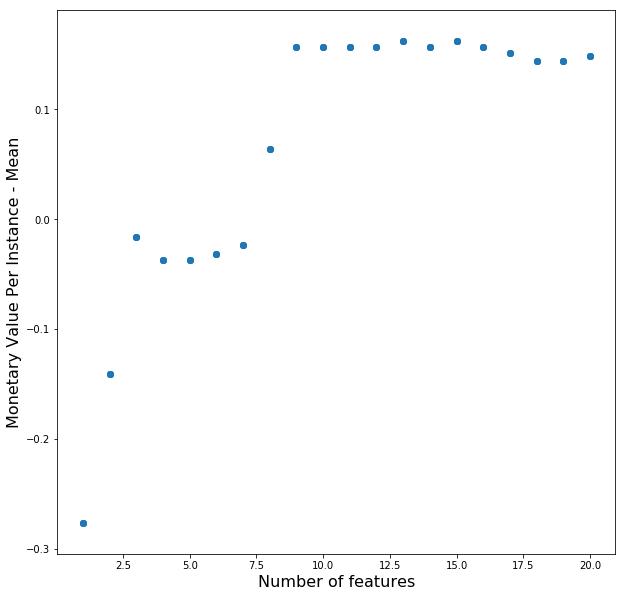

In [189]:
plt.rcParams['figure.figsize'] = (10,10)

plt.scatter(result_table[result_table["Model"] == "LogisticRegression"]["Feature Count"],
         result_table[result_table["Model"] == "LogisticRegression"]["Monetary Value Per Instance - Mean"])
plt.xlabel('Number of features', fontsize=16)
plt.ylabel('Monetary Value Per Instance - Mean', fontsize=16)

In [196]:
best_model = result_table_aggregated.loc[result_table_aggregated["Monetary Value Per Instance - Mean"].argmax()]["Raw Model"]
best_model_features = result_table_aggregated.loc[result_table_aggregated["Monetary Value Per Instance - Mean"].argmax()]["Features"]

print(best_model)
print(best_model_features)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)
['trustLevel' 'totalScanTimeInSeconds' 'lineItemVoids'
 'scansWithoutRegistration' 'scannedLineItemsPerSecond' 'valuePerSecond'
 'lineItemVoidsPerPosition' 'scannedLineItems' 'pricePerScannedLineItem'
 'scansWithoutRegistrationPerScannedLineItem'
 'quantityModificationsPerScannedLineItem' 'lineItemVoidsPerSecond'
 'quantityModificationsPerSecond']


In [195]:
from sklearn.metrics import confusion_matrix

def get_monetary_value(cm, y_holdout):
        tn, fp, fn, tp = cm.ravel()
        print("True negative: ", tn)
        print("False positive: ", fp)
        print("False negative: ", fn)
        print("True positive: ", tp)
        score = (-25)*fp + (-5)*fn + 5*tp
        print(score, 'for ', len(y_holdout), ' instances in the test set')
        print(score/len(y_holdout), ' per instance in the test set')
        return score
    
cm = confusion_matrix(Y , best_model.predict(X[best_model_features]))

monetary_value = get_monetary_value(cm, Y)

True negative:  1770
False positive:  5
False negative:  8
True positive:  96
315 for  1879  instances in the test set
0.16764236295902077  per instance in the test set
